In [9]:
from matplotlib import pyplot as plt
import numpy as np

In [10]:
# Load stats:
"""
# Rows: [generations]
# Cols:
0: evaluations (one evaluation of one individual -- may be multiple rollouts)
1: median fitness 
2: maximum fitness
3: top fitness (best fitness ever)
4: peak fitness (fitness earned with best single weight value by max individual)
5: median # of nodes in population
6: median # of connections in population]
"""
# stats = np.loadtxt('log/sample_stats.out', delimiter=',')
stats = np.loadtxt('smc_stats.out', delimiter=',')
# runTime = np.loadtxt('log/sample_runTime.out', delimiter=',')
runTime = np.loadtxt('sample_runTime.out', delimiter=',')

Text(0.5, 1.0, 'Sample Run of WANN Sparse Mountain Climber on 4 Core Laptop')

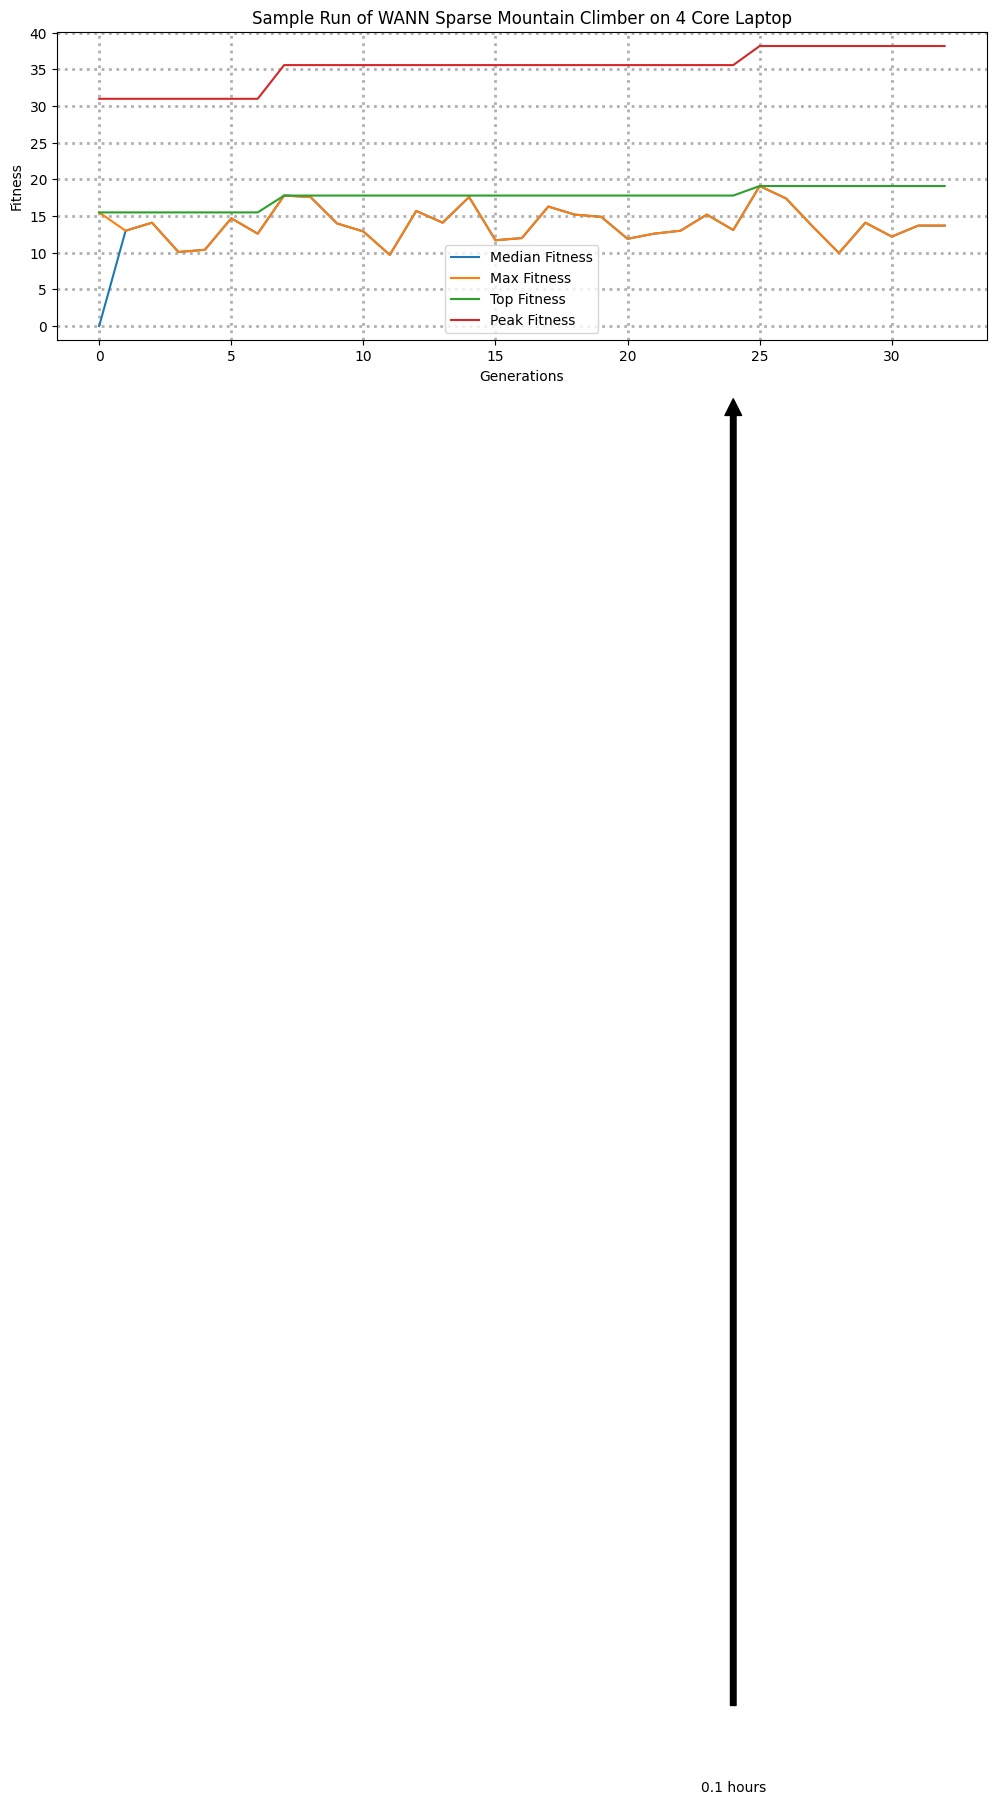

In [11]:
# Plot fitness progress:
plt.figure(figsize=(12,4))
plt.grid(linestyle='--', linewidth=0.1)
plt.plot(stats[:,1], label="Median Fitness")
plt.plot(stats[:,2], label="Max Fitness")
plt.plot(stats[:,3], label="Top Fitness")
plt.plot(stats[:,4], label="Peak Fitness")
plt.legend()
plt.grid(linestyle=':', linewidth=2)
plt.xlabel('Generations')
plt.ylabel('Fitness')

# Approximate time on 8 cores
genKey = np.array([32,128,256,384,640,896],dtype=int)

for i in range(len(genKey)):
  gen = int(genKey[i]/8)-1
  time = runTime[gen]/3600
  plt.annotate(str(round(time,1))+' hours', xy=(gen*8,0), xytext=(gen*8,-200),
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

# plt.title('Sample Run of WANN Cart-Pole Swing-Up on 8 Core Laptop')
plt.title('Sample Run of WANN Sparse Mountain Climber on 4 Core Laptop')